In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
!pip install svgling

     |████████████████████████████████| 66 kB 2.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/laugustyniak/anaconda3/envs/graph_tool_p36/bin/python3.6 -m pip install --upgrade pip' command.


In [32]:
from pathlib import Path
import svgling
import pandas as pd
from tqdm import tqdm
from collections import Counter
from more_itertools import flatten

from aspects.utilities import settings
from aspects.pipelines.aspect_analysis import AspectAnalysis
from aspects.analysis.domain_statistics import generate_domain_statistics

In [4]:
pd.set_option('display.max_colwidth', -1)

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { max-width:1800px !important;width:auto; }</style>"))

In [6]:
datasets = [
    settings.AMAZON_REVIEWS_APPS_FOR_ANDROID_DATASET_JSON,
    settings.AMAZON_REVIEWS_AUTOMOTIVE_DATASET_JSON,
    settings.AMAZON_REVIEWS_AMAZON_INSTANT_VIDEO_DATASET_JSON,
    settings.AMAZON_REVIEWS_CELL_PHONES_AND_ACCESSORIES_DATASET_JSON
]

In [7]:
p = Path('/datasets/sentiment/aspects/sentiment-backend/aspects/results')

In [77]:
domain_statistics_df, discourse_trees_dfs = generate_domain_statistics(p)

 22%|██▏       | 2/9 [12:07<25:34, 219.24s/it]

Problem with parsing /datasets/sentiment/aspects/sentiment-backend/aspects/results/reviews_Amazon_Instant_Video/discourse_trees_df.pkl - 


 44%|████▍     | 4/9 [12:46<09:44, 116.81s/it]

Not fully processed dataset: /datasets/sentiment/aspects/sentiment-backend/aspects/results/reviews_Cell_Phones_and_Accessories-50001-docs/discourse_trees_df.pkl


100%|██████████| 9/9 [13:24<00:00, 89.43s/it] 


In [78]:
domain_statistics_df.set_index('Dataset Name').T

Dataset Name,Automotive 50001,Cell Phones and Accessories 50000,Amazon Instant Video 50001,Amazon Instant Video 25000,Apps for Android,Apps for Android 25000,Automotive 25000
# of reviews,11067.000000,38332.000000,11772.000000,23319.000000,78974.000000,23963.000000,23387.000000
Average length of reviews (# of words),44.659890,71.210738,40.515375,52.601484,37.102502,43.433710,58.080472
Average number of EDUs,6.697750,10.688772,6.157917,7.644925,5.741535,6.551141,8.425022
# of unique aspects,4036.000000,15190.000000,5055.000000,10633.000000,14940.000000,6478.000000,8606.000000
# of all aspects,12569.000000,94625.000000,12667.000000,36442.000000,69632.000000,25811.000000,31903.000000
# of unique aspects in tuples,3137.000000,14025.000000,4117.000000,9387.000000,11224.000000,5111.000000,7144.000000
# of aspects in tuples (aspect frequency >= 10),102.000000,654.000000,113.000000,393.000000,421.000000,176.000000,242.000000
# of all aspects (aspect frequency >= 10),128.000000,721.000000,161.000000,472.000000,595.000000,230.000000,294.000000
# of DTs with at least one pair of aspects,2997.000000,18490.000000,2683.000000,6991.000000,15523.000000,5751.000000,7490.000000
# of DTs with a single aspect,3474.000000,10355.000000,3340.000000,6783.000000,24160.000000,7206.000000,7204.000000


In [65]:
domain_statistics_df.sort_values('# of reviews')

,Dataset Name,# of reviews,Average length of reviews (# of words),Average number of EDUs,# of all aspects,# of unique aspects in tuples,# of aspects in tuples (aspect frequency >= 10),# of all aspects (aspect frequency >= 10),# of DTs with at least one pair of aspects,# of DTs with a single aspect,Average number of aspect tuples from each DT,Minimum depth of DT,Average depth of DT,Maximum depth of DT
0,Automotive 50001,11067,44.659890,6.697750,4036,3137,102,128,2997,3474,8.276046,2,4.752779,18
2,Amazon Instant Video 50001,11772,40.515375,6.157917,5055,4117,113,161,2683,3340,7.693510,2,4.526334,19
3,Amazon Instant Video 25000,23319,52.601484,7.644925,10633,9387,393,472,6991,6783,10.904756,2,5.048801,33
6,Automotive 25000,23387,58.080472,8.425022,8606,7144,242,294,7490,7204,11.742079,2,5.360927,32
5,Apps for Android 25000,23963,43.433710,6.551141,6478,5111,176,230,5751,7206,8.994283,2,4.805826,24
1,Cell Phones and Accessories 50000,38332,71.210738,10.688772,15190,14025,654,721,18490,10355,14.428024,2,5.840055,39
4,Apps for Android,78974,37.102502,5.741535,14940,11224,421,595,15523,24160,7.110049,2,4.474207,23


In [74]:
domain_statistics_df.set_index('Dataset Name').T

Dataset Name,Automotive 50001,Cell Phones and Accessories 50000,Amazon Instant Video 50001,Amazon Instant Video 25000,Apps for Android,Apps for Android 25000,Automotive 25000
# of reviews,11067.000000,38332.000000,11772.000000,23319.000000,78974.000000,23963.000000,23387.000000
Average length of reviews (# of words),44.659890,71.210738,40.515375,52.601484,37.102502,43.433710,58.080472
Average number of EDUs,6.697750,10.688772,6.157917,7.644925,5.741535,6.551141,8.425022
# of all aspects,4036.000000,15190.000000,5055.000000,10633.000000,14940.000000,6478.000000,8606.000000
# of unique aspects in tuples,3137.000000,14025.000000,4117.000000,9387.000000,11224.000000,5111.000000,7144.000000
# of aspects in tuples (aspect frequency >= 10),102.000000,654.000000,113.000000,393.000000,421.000000,176.000000,242.000000
# of all aspects (aspect frequency >= 10),128.000000,721.000000,161.000000,472.000000,595.000000,230.000000,294.000000
# of DTs with at least one pair of aspects,2997.000000,18490.000000,2683.000000,6991.000000,15523.000000,5751.000000,7490.000000
# of DTs with a single aspect,3474.000000,10355.000000,3340.000000,6783.000000,24160.000000,7206.000000,7204.000000
Average number of aspect tuples from each DT,8.276046,14.428024,7.693510,10.904756,7.110049,8.994283,11.742079


In [79]:
reviews_set = ['Automotive 25000', 'Cell Phones and Accessories 50000', 'Apps for Android', 'Amazon Instant Video 25000']

In [82]:
domain_statistics_df.set_index('Dataset Name').T[reviews_set]

Dataset Name,Automotive 25000,Cell Phones and Accessories 50000,Apps for Android,Amazon Instant Video 25000
# of reviews,23387.000000,38332.000000,78974.000000,23319.000000
Average length of reviews (# of words),58.080472,71.210738,37.102502,52.601484
Average number of EDUs,8.425022,10.688772,5.741535,7.644925
# of unique aspects,8606.000000,15190.000000,14940.000000,10633.000000
# of all aspects,31903.000000,94625.000000,69632.000000,36442.000000
# of unique aspects in tuples,7144.000000,14025.000000,11224.000000,9387.000000
# of aspects in tuples (aspect frequency >= 10),242.000000,654.000000,421.000000,393.000000
# of all aspects (aspect frequency >= 10),294.000000,721.000000,595.000000,472.000000
# of DTs with at least one pair of aspects,7490.000000,18490.000000,15523.000000,6991.000000
# of DTs with a single aspect,7204.000000,10355.000000,24160.000000,6783.000000


In [76]:
print(domain_statistics_df.set_index('Dataset Name').T[].to_latex())

\begin{tabular}{lrrrr}
\toprule
Dataset Name &  Automotive 25000 &  Cell Phones and Accessories 50000 &  Apps for Android &  Amazon Instant Video 25000 \\
\midrule
\# of reviews                                    &  23387.000000 &  38332.000000 &  78974.000000 &  23319.000000 \\
Average length of reviews (\# of words)          &  58.080472 &  71.210738 &  37.102502 &  52.601484 \\
Average number of EDUs                          &  8.425022 &  10.688772 &  5.741535 &  7.644925 \\
\# of all aspects                                &  8606.000000 &  15190.000000 &  14940.000000 &  10633.000000 \\
\# of unique aspects in tuples                   &  7144.000000 &  14025.000000 &  11224.000000 &  9387.000000 \\
\# of aspects in tuples (aspect frequency >= 10) &  242.000000 &  654.000000 &  421.000000 &  393.000000 \\
\# of all aspects (aspect frequency >= 10)       &  294.000000 &  721.000000 &  595.000000 &  472.000000 \\
\# of DTs with at least one pair of aspects      &  7490.000000 &  1849

In [ ]:
domain_statistics_df

In [29]:
discourse_trees_dfs['Automotive 50001']

text  \
10     Tinted windows are great untell you go to back up at night. These lights are much brighter than stock and now I can see backing up. They also cam in a nice pakage .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
20     Awesome paint, I used Max promotor as a prep and the Ford Ranger dash and door panels came out looking good.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
23     Their paints are a coatings, not just a paint.  Great for car interiors.  Spray lightly with multiple coats.  Use their texture spray first.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
26     Mediocre                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
27     This was a great quality for the price.  Haven't had a chance to wear it yet but have checked many rain suits for the bike and this seems to be the best.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
...                                                                                                                                                          ...                                                                                                                                                                                                                                                                                                                        

'Their paints are a coatings, not just a paint.  Great for car interiors.  Spray lightly with multiple coats.  Use their texture spray first.'

In [51]:
import svgling.html
from svgling.html import multiline_text as ml

n = 12
print(discourse_trees_dfs['Apps for Android 25000'].text.tolist()[n])
svgling.html.draw_tree(discourse_trees_dfs['Apps for Android 25000'].discourse_tree.tolist()[n])

This is great for kids my two year old son loves it and keeps saying again everytime it is done. I recommend this for anyone with you kids.


In [10]:
stats_df.sort_values(by='Dataset Name', ascending=False, inplace=True)

NameError: name 'stats_df' is not defined

In [ ]:
stats_df = stats_df[stats_df['# of reviews'] > 200]

In [12]:
df = pd.read_pickle('/datasets/sentiment/aspects/sentiment-backend/aspects/results/reviews_Amazon_Instant_Video-25000-docs/discourse_trees_df.pkl')

In [16]:
rules_counter = Counter([rule[2] for rule in flatten(df.rules.tolist())])

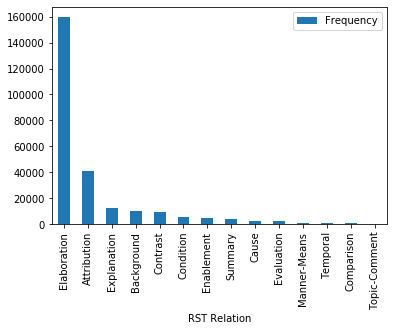

In [24]:
pd.DataFrame(rules_counter.most_common(), columns=['RST Relation', 'Frequency']).plot(x='RST Relation', kind='bar')

In [84]:
df = domain_statistics_df.set_index('Dataset Name').T[reviews_set]

In [83]:
rules_counter = Counter([rule[2] for rule in flatten(df.rules.tolist())])
pd.DataFrame(rules_counter.most_common(), columns=['RST Relation', 'Frequency']).plot(x='RST Relation', kind='bar')

AttributeError: 'DataFrame' object has no attribute 'rules'

In [88]:
import matplotlib.pyplot as plt

Automotive 25000
Cell Phones and Accessories 50000
Apps for Android
Amazon Instant Video 25000


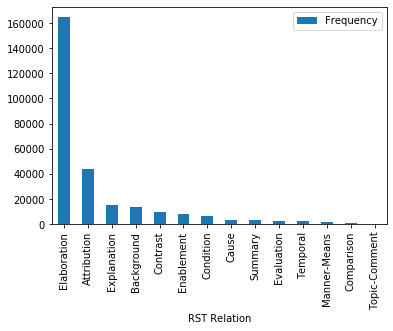

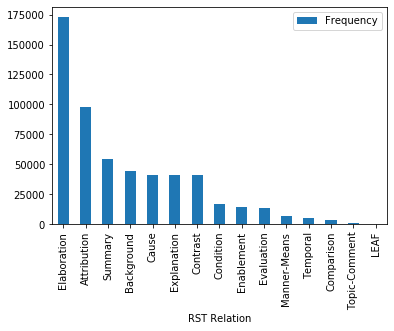

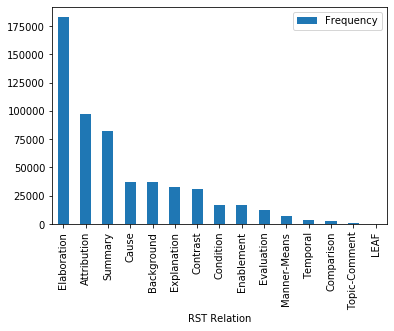

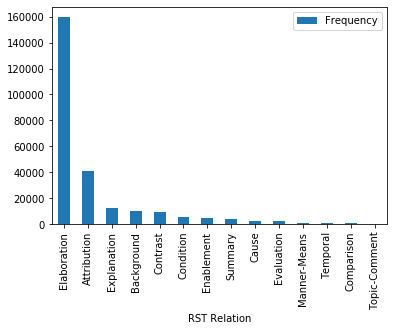

In [93]:
for domain in reviews_set:
    print(domain)
    df = discourse_trees_dfs[domain]
    rules_counter = Counter([rule[2] for rule in flatten(df.rules.tolist())])
    pd.DataFrame(rules_counter.most_common(), columns=['RST Relation', 'Frequency']).plot(x='RST Relation', kind='bar')